In [1]:
import sys
sys.path.append("../src")
from src import debias
from joblib import load, dump
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression, PassiveAggressiveClassifier
from joblib import dump
import torch



/Users/david/miniconda3/envs/good_conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = roberta-large

In [3]:
def tsne(vecs, labels, title="", ind2label = None, words = None, metric = "l2"):

  tsne = TSNE(n_components=2)#, angle = 0.5, perplexity = 20)
  vecs_2d = tsne.fit_transform(vecs)
  #label_names = sorted(list(set(labels.tolist())))
  label_names = sorted(list(set(labels.tolist())))
  num_labels = len(label_names)

  names = sorted(set(labels.tolist()))

  plt.figure(figsize=(6, 5))
  colors = "red", "blue"
  for i, c, label in zip(sorted(set(labels.tolist())), colors, names):
     plt.scatter(vecs_2d[labels == i, 0], vecs_2d[labels == i, 1], c=c,
                label=label if ind2label is None else ind2label[label], alpha = 0.3, marker = "s" if i==0 else "o")
     plt.legend(loc = "upper right")

  plt.title(title)
  plt.savefig("embeddings.{}.png".format(title), dpi=600)
  plt.show()
  return vecs_2d

## Load data

In [8]:

path = "/data/dkletz/Experiences/negation_intervention_and_test/training_classifiers/get_data/embeddings/embeddings0_10000"
path = "/Users/david/Desktop/Doctorat/experiences/2022-23/Interventions/with_neg_eval/negation_intervention_and_test/training_classifiers/get_data/embeddings/embeddings0_10000"

embedds = torch.load(path)

    

In [26]:
list_pos = []
list_neg = []



for key in embedds.keys():
    list_pos.extend(embedds[key][1])
    list_neg.extend(embedds[key][0])

array_pos = np.stack(list_pos[:10])
array_neg = np.stack(list_neg)



In [27]:

labs = [0 for k in range(len(array_neg))]
print(len(labs))
labs.extend([1 for k in range(len(array_pos))])
print(len(labs))
arrays = np.concatenate((array_neg, array_pos), axis=0)
labs = np.array(labs)

10
20


In [28]:
print(labs)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(arrays, labs, test_size=0.33, random_state=42, shuffle=True)


In [30]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(13, 1024)
(13,)
(7, 1024)
(7,)


In [31]:
print(y_train)

[0 1 1 1 0 0 1 0 1 0 1 1 0]


a
[0 1 1 1 0 0 1 0 1 0 1 1 0]


/Users/david/miniconda3/envs/good_conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/david/miniconda3/envs/good_conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


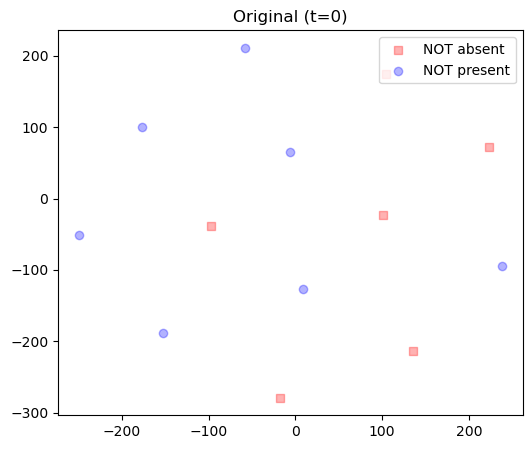

In [32]:

M =  2000
ind2label =  {1: "NOT present", 0: "NOT absent"}
print("a")
print(y_train[:M])
tsne_before = tsne(X_train[:M], y_train[:M], title = "Original (t=0)", ind2label =ind2label )


In [39]:
#gender_clf = LinearSVC
#gender_clf = SGDClassifier
#neg_clf = LogisticRegression
#gender_clf = LinearDiscriminantAnalysis
neg_clf = Perceptron

#params_svc = {'fit_intercept': False, 'class_weight': None, "dual": False, 'random_state': 0}
#params_sgd = {'fit_intercept': False, 'class_weight': None, 'max_iter': 1000, 'random_state': 0}
#params = params_svc
#params = {'loss': 'hinge', 'n_jobs': 16, 'penalty': 'l2', 'max_iter': 2500, 'random_state': 0}
params = {"penalty" : "l1", 'max_iter': 500000, 'random_state': 0}
#params = {}
n = 35
min_acc = 0
is_autoregressive = True
dropout_rate = 0

P, rowspace_projs, Ws, accuracies = debias.get_debiasing_projection(neg_clf, params, n, 1024, is_autoregressive, min_acc,
                                    X_train, y_train, X_test, y_test,
                                       Y_train_main=None, Y_dev_main=None, 
                                        by_class = False, dropout_rate = dropout_rate, steps = False, model_name = model_name)

iteration: 34, accuracy: 0.5714285714285714: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:14<00:00,  2.34it/s]


final_accur : [1.0, 0.8571428571428571, 0.42857142857142855, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.5714285714285714, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714]


ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:

all_significantly_biased_cleaned = P.dot(X_train.T).T

tsne_after = tsne(all_significantly_biased_cleaned[:M], y_train[:M], title = "Projected (t={})".format(n), ind2label =ind2label )


In [ ]:
import matplotlib.pyplot as plt


In [ ]:



plt.clf()


plt.plot(accuracies, label='Roberta-large')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
#plt.show()
plt.savefig("accur_according_to_iterations.pdf", dpi=400)